<a href="https://colab.research.google.com/github/vinkharisma/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Metode Deteksi Objek : TemplateMatching, Edge Detection, Corner Detection, Grid Detection, Contour Detection**

## **Object Detection**

Metode yang digunakan : 
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [18]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### 2. 
Implementasikan6metodetemplatematchingpadaOpenCVdenganmenggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


#### **Template Matching**

Menggunakan library openCV : 

**cv.matchTemplate()**, dengan parameter : 

•	**image :** citra input

•	**templ :** template yang dicari, ukurannya tidak boleh lebih besar dari citra input

•	**methode :** metode dari template matching

Jenis metode template matching di openCV : 
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

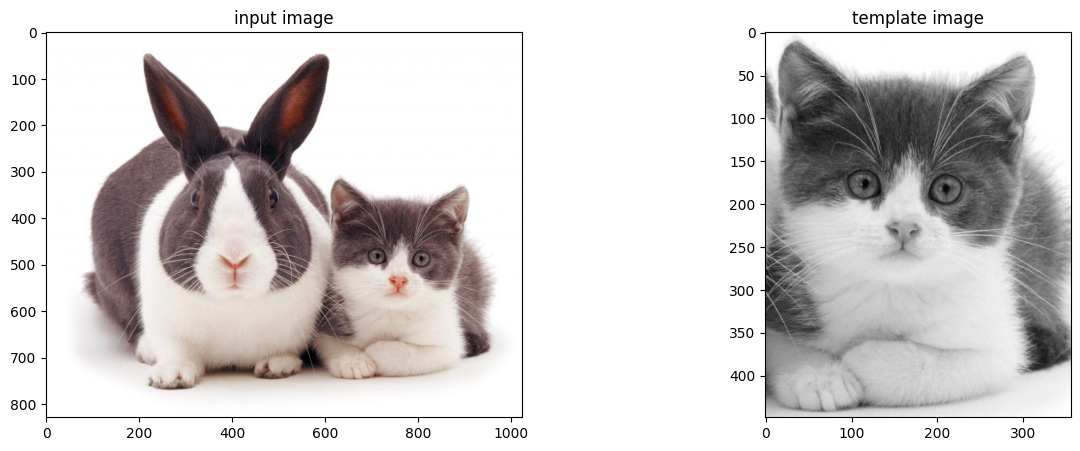

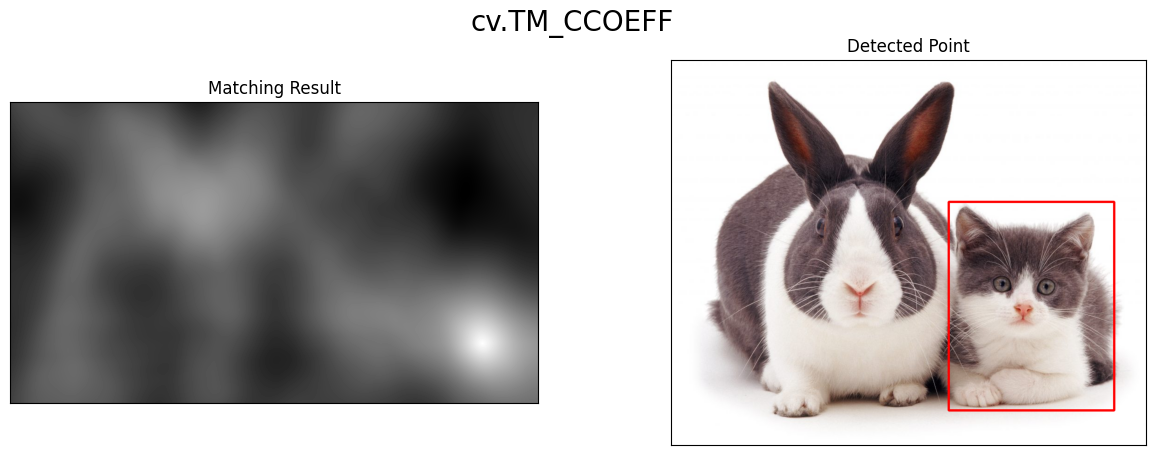

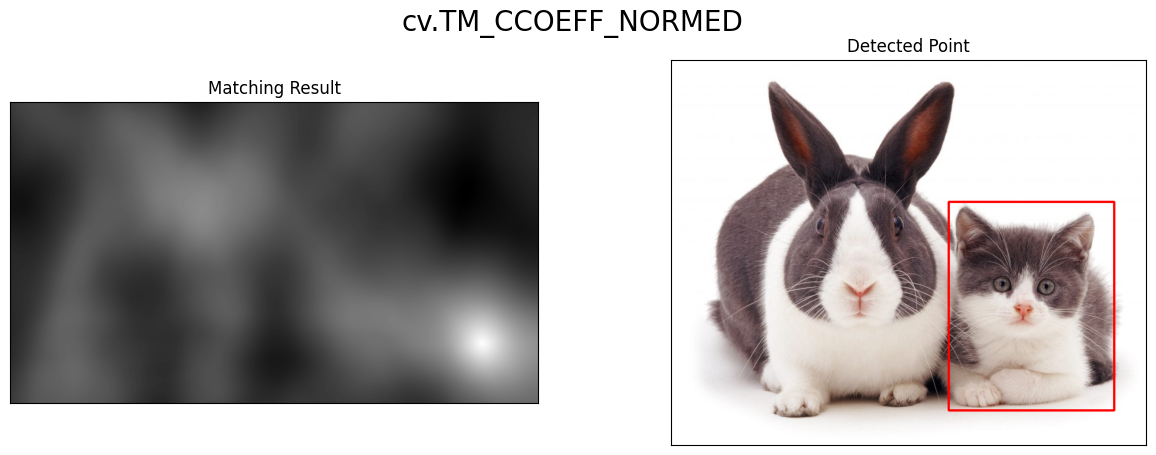

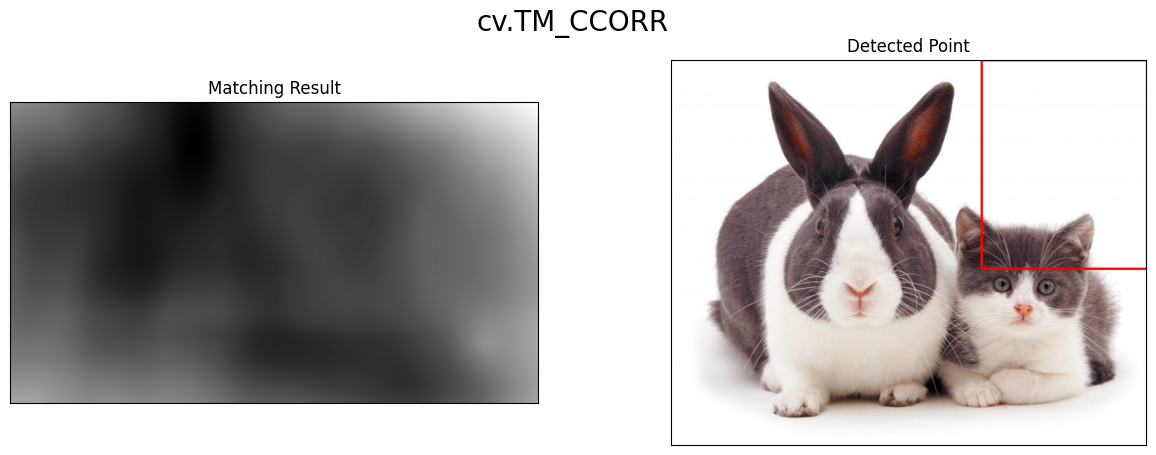

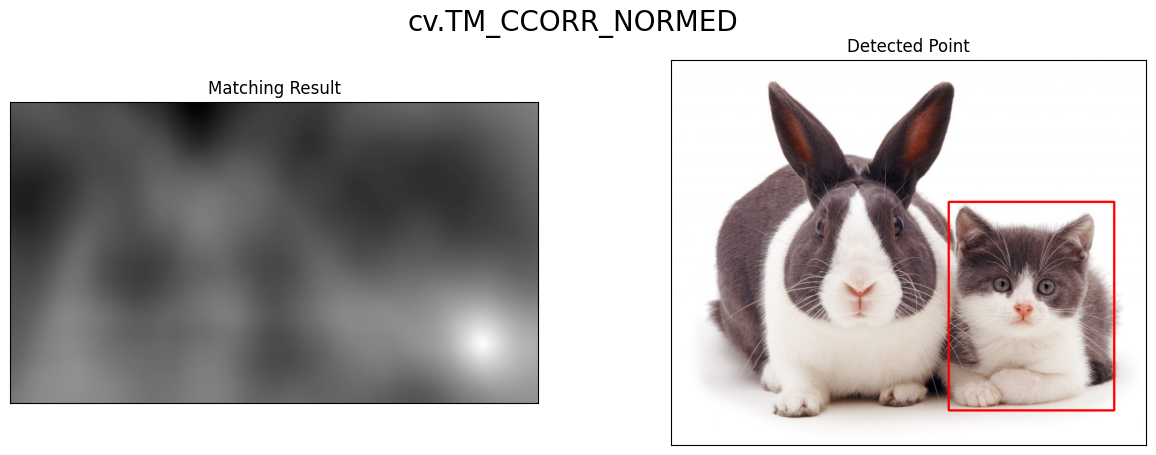

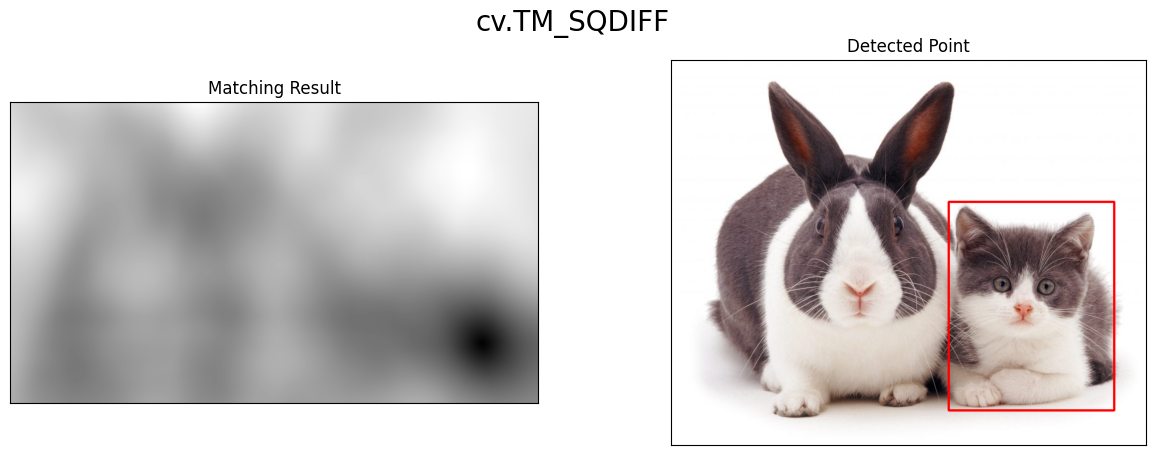

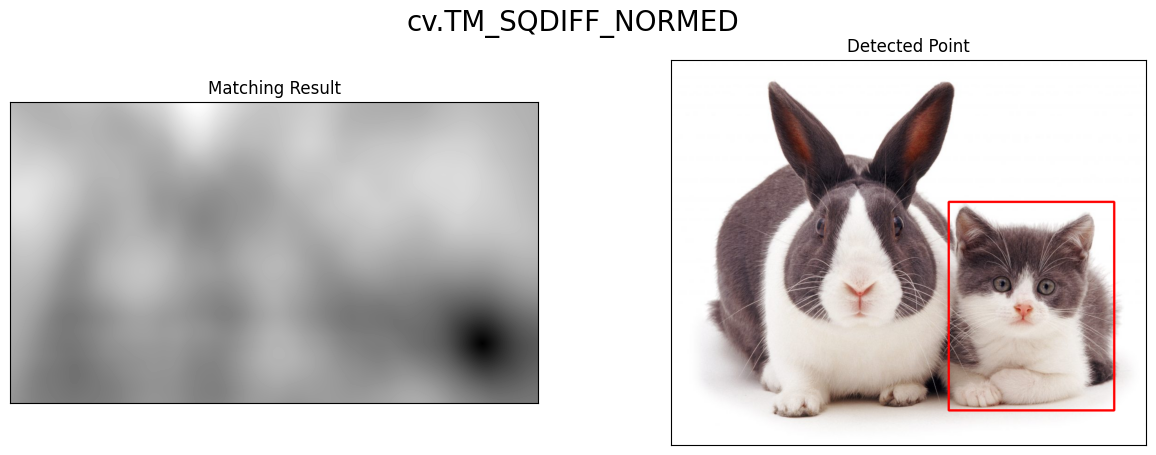

In [115]:
# Load citra input 
img = cv.imread('/content/drive/MyDrive/PCVK/Images/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

# Load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/cat2_templatejpg.jpg',0)

# Dimensi citra
w, h = template.shape[::-1]

# Print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
            
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, (0,0,255), thickness=3)

    plt.figure(figsize=(15,5))

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    print("\n\n")
    plt.suptitle(meth, fontsize = 20)

    plt.show()
     

### 3. 

Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

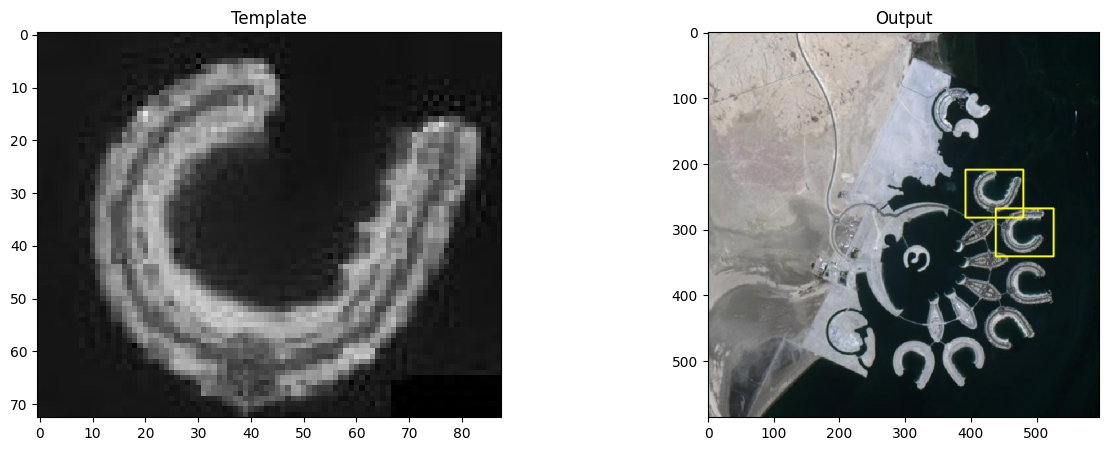

In [114]:
# Load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/bahrain.jpg')

# Load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/bahrain-template.jpg',0)

# Dimensi citra
w, h = template.shape[::-1]

# Threshold
threshold = 0.8

# Normalized Cross-Correlation
def norm_cross_correlation(img, template):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    kh, kw = template.shape
    output = cv.matchTemplate(img_gray, template, cv.TM_CCORR_NORMED)
    return output

# Non-Maximum Suppression
def non_max_suppression(rects, threshold):
    if len(rects) == 0:
        return []
    pick = []
    x1 = rects[:,0]
    y1 = rects[:,1]
    x2 = rects[:,2]
    y2 = rects[:,3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        suppress = [last]
        for pos in range(last):
            j = idxs[pos]
            xx1 = max(x1[i], x1[j])
            yy1 = max(y1[i], y1[j])
            xx2 = min(x2[i], x2[j])
            yy2 = min(y2[i], y2[j])
            w = max(0, xx2 - xx1 + 1)
            h = max(0, yy2 - yy1 + 1)
            overlap = float(w * h) / area[j]
            if overlap > threshold:
                suppress.append(pos)
        idxs = np.delete(idxs, suppress)
    return rects[pick]

# Template matching
output = norm_cross_correlation(img, template)

# Find location
loc = np.where(output >= threshold)
rects = []
for pt in zip(*loc[::-1]):
    rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])

# Non-Maximum Suppression
rects = np.asarray(rects)
rects = non_max_suppression(rects, 0.3)

# Draw bounding box
for (x, y, x2, y2) in rects:
    cv.rectangle(img, (x, y), (x2, y2), (0, 255, 255), 2)

# Show output
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[0].set_title("Template")
axarr[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[1].set_title("Output")

plt.show()

### 4. 

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

#### a. Sobel Edge Detection

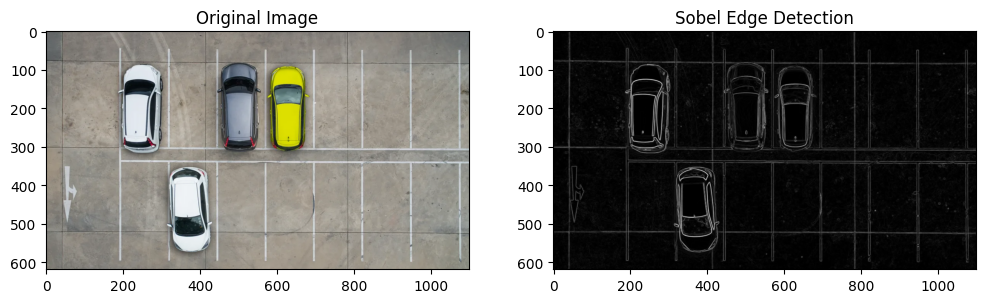

In [116]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/car-park.jpg')

# Mengubah ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menghitung gradient pada sumbu x dan y dengan kernel 3x3
grad_x = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3)

# Menghitung magnitudo dan arah gradien
mag, angle = cv.cartToPolar(grad_x, grad_y, angleInDegrees=True)

plt.figure(figsize = (12,5))

# Menampilkan gambar asli
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Menampilkan hasil edge detection dengan Sobel
plt.subplot(122)
plt.imshow(mag, cmap='gray')
plt.title('Sobel Edge Detection')

plt.show()

#### b. Canny Edge Detection

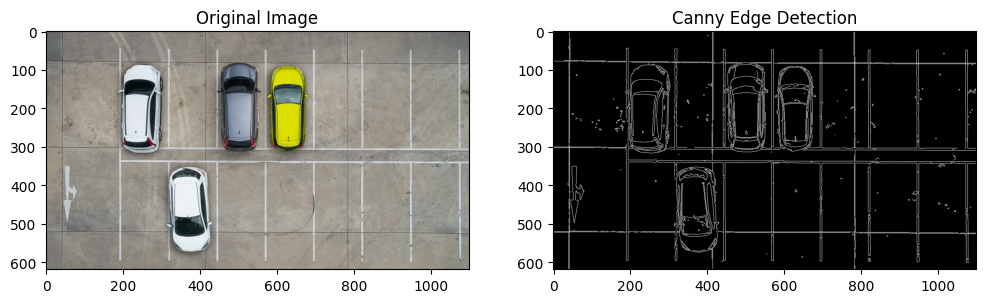

In [117]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/car-park.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray, 100, 200)

plt.figure(figsize = (12,5))

plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

#### c. Laplacian Edge Detection

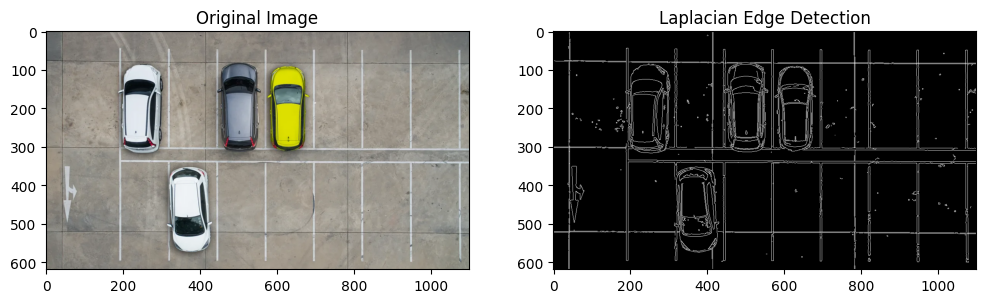

In [40]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/car-park.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(img,cv.CV_64F)

plt.figure(figsize = (12,5))

plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()

### 5. 

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

#### a. Harris Corner Detection

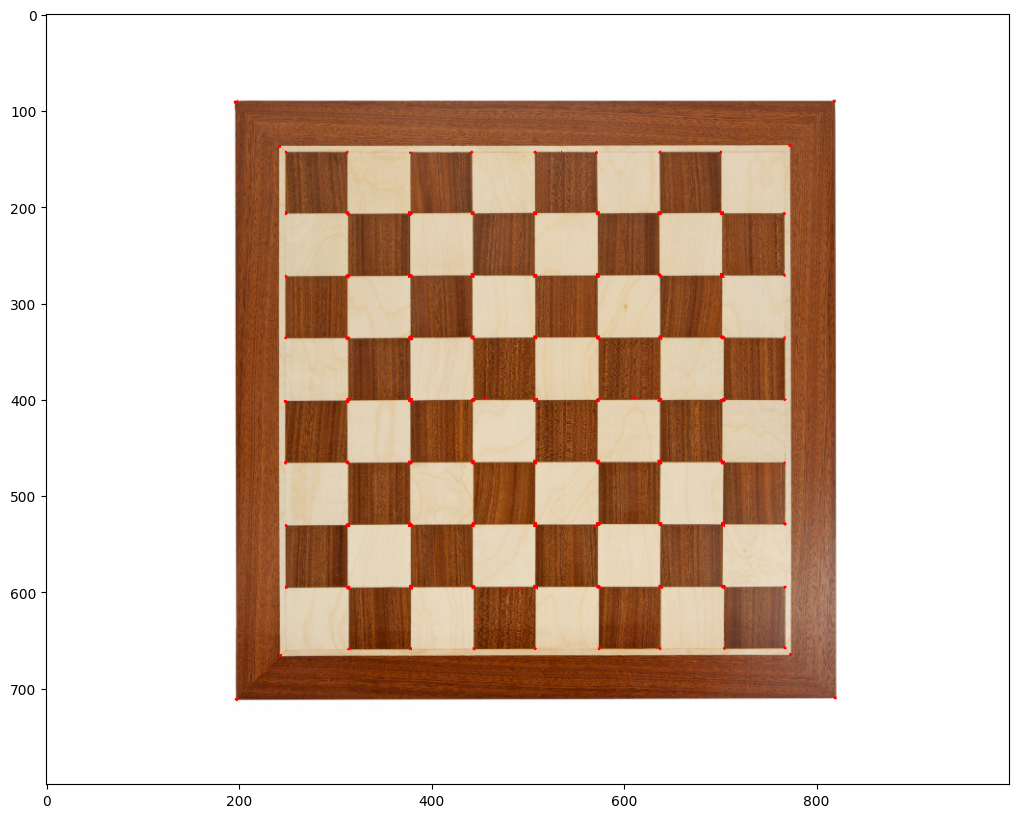

In [71]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

dst = cv.cornerHarris(gray,3,1,0.04)

gray = np.float32(gray)
harris_output = cv.cornerHarris(gray,2,3, 3)

harris_output = cv.dilate(harris_output, None)

img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(15,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.show()

#### b. Shi-Tomasi Detection

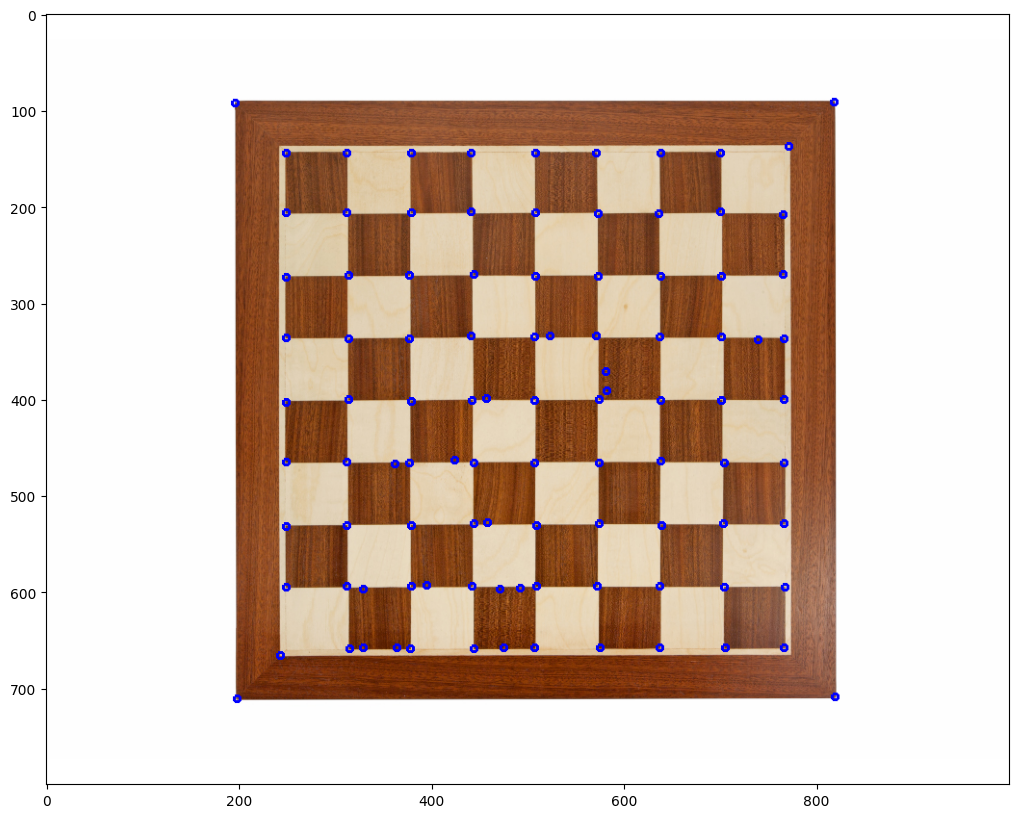

In [72]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.show()

### 6. 

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

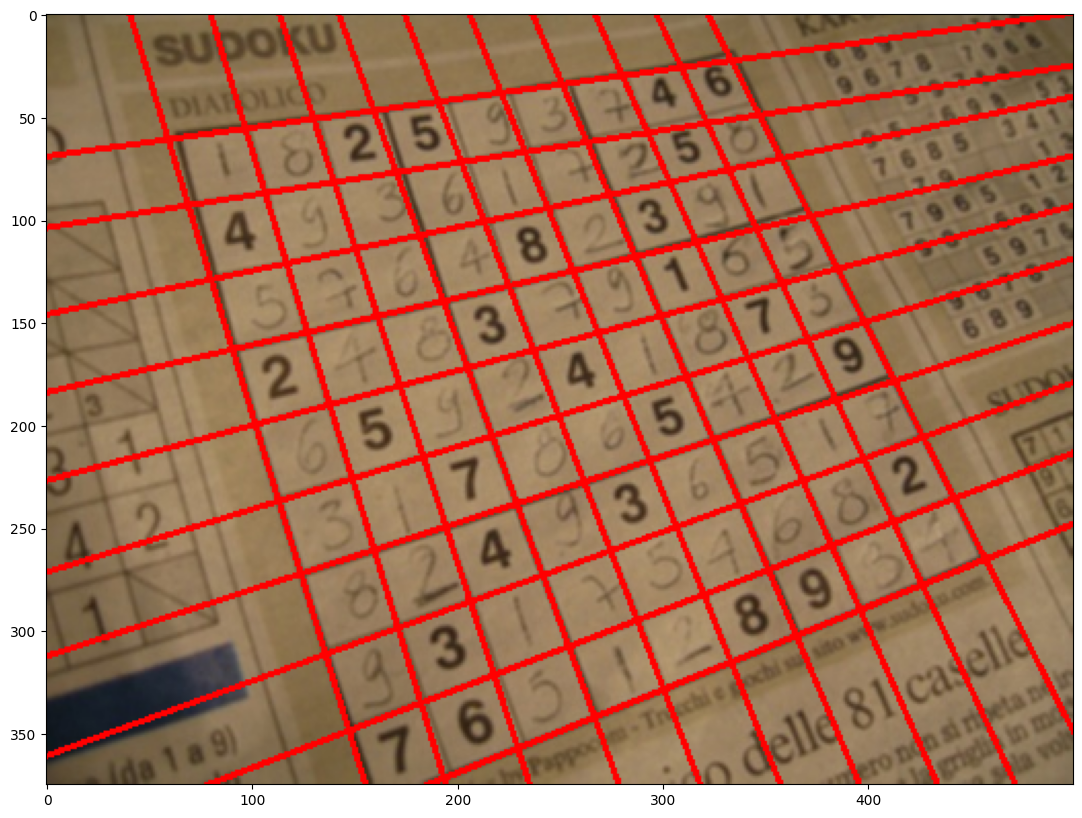

In [76]:
img_s = cv.imread('/content/drive/MyDrive/PCVK/Images/sudoku.jpg') 
img_gs = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gs, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_s, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(15,10)) 
    plt.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))

    plt.show()

### 7. 

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

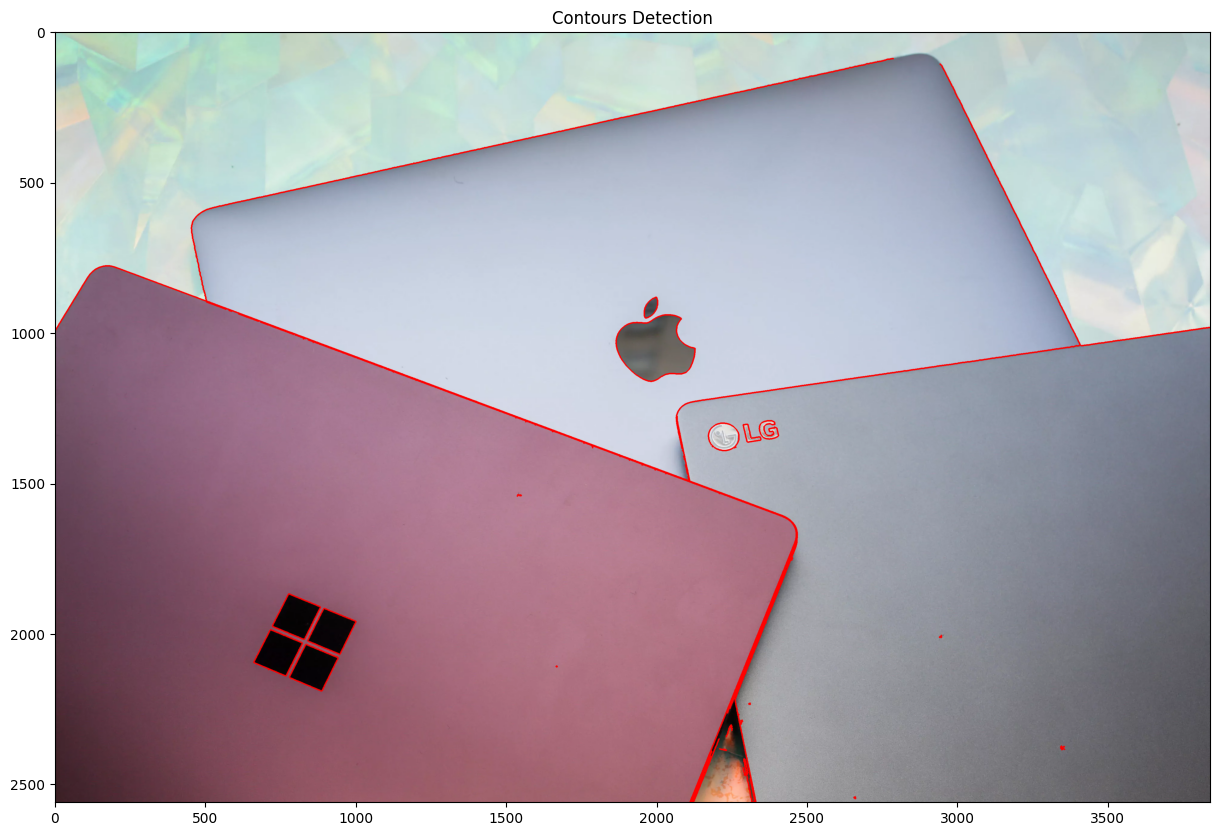

In [67]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/laptop.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

edged = cv.Canny(gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(15,10)) 

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Contours Detection')

plt.show()